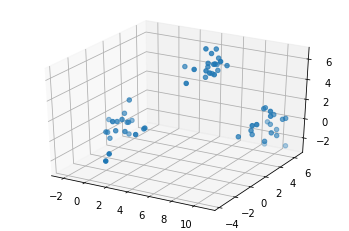

In [59]:
import numpy as np
import matplotlib.pyplot as plt

points = [np.random.randn(3) for _ in range(20)]
points.extend([np.random.randn(3) + np.array([5,5,5]) for _ in range(20)])
points.extend([np.random.randn(3) + np.array([10,5,0]) for _ in range(20)])
points = np.array(points)

fig = plt.figure()
ax = fig.gca(projection='3d')

X = points[:,0]
Y = points[:,1]
Z = points[:,2]

ax.scatter(X,Y,Z)

plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 9.93850633e+00  4.87114647e+00 -9.77419128e-02]
 [ 1.30432928e-01 -1.84104877e-01 -2.82609857e-03]
 [ 4.66150418e+00  4.71967601e+00  5.00628535e+00]]


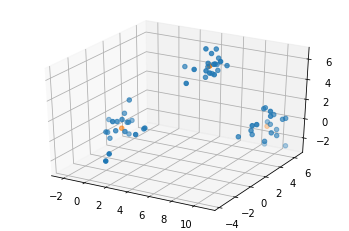

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(points)

print(kmeans.labels_)
print(kmeans.cluster_centers_) # 각 클러스터 별 중심 좌표 들어감

centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.gca(projection='3d')

X = points[:,0]
Y = points[:,1]
Z = points[:,2]

ax.scatter(X,Y,Z)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2])

plt.show()

In [66]:
def kmeans(points, k, max_iters=10):
    # 1.cluster centers 랜덤하게 생성 forgy: 있는 점 중에서 랜덤하게 k개를 골라서 초기 cluseter center로 설정
    indices = np.random.choice(n_points, k, replace=False) # 0~9 사이의 숫자 3개(중복 가능) replace로 중복 제거
    cluster_centers = points[indices]

    for iter in range(max_iters):

        # 2. 각각의 점마다 어떤 cluster center와 가장 가까운지 계산 및 할당(labels 계산)

        labels = []

        for p in points:
            min_dist = np.inf
            min_cid = -1
            for cid, c in enumerate(cluster_centers):
                dist = euclidian_distance(p, c)
                if dist < min_dist:
                    min_dist = dist
                    min_cid = cid
            labels.append(min_cid)

        labels = np.array(labels)

        # 3. 새로운 labels를 이용해서, cluster_centers 새로 계산
        cluster_centers
        new_cluster_centers = np.zeros_like(cluster_centers)
        counts = np.zeros(k)

        for l, p in zip(labels,points):
            new_cluster_centers[l] += p
            counts[l] += 1

        for i in range(k):
            new_cluster_centers[i] /= counts[i] # 평균

        print("iteration #", iter)

        if np.array_equal(cluster_centers, new_cluster_centers):
            break
        else:
            cluster_centers = new_cluster_centers

        # 같은 cluster에 속한 점들(같은 cluster_center와 가장 가까운 점들)을 평균내고 싶다!


        return labels, cluster_centers

In [67]:
k=10
max_iters = 10
n_points = points.shape[0]

def euclidian_distance(a, b):
    return ((a - b) **2).sum() ** 0.5


iteration # 0


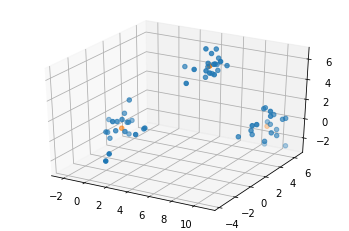

In [81]:
lables, cluster_centers = kmeans(points, k)

fig = plt.figure()
ax = fig.gca(projection='3d')

X = points[:,0]
Y = points[:,1]
Z = points[:,2]

ax.scatter(X,Y,Z)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2])

plt.show() # 제대로 동작하는 것을 알 수 있다!!!

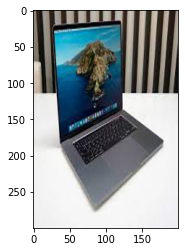

153

In [104]:
from PIL import Image

img = Image.open("다운로드.jpeg")

width = 200
height = img.height * width // img.width

img = img.resize((200, 300))

plt.imshow(img)
plt.show()
height

In [93]:
pixels = np.array(img).reshape(60000, 3).astype(np.float32)

labels, cluster_centers = kmeans(pixels, 3)

iteration # 0


In [96]:
for l, i in zip(labels, range(pixels.shape[0])):
    pixels[i] = cluster_centers[l]

pixels = pixels.astype(np.uint8)

In [97]:
pixels

array([[170, 179, 181],
       [170, 179, 181],
       [170, 179, 181],
       ...,
       [170, 179, 181],
       [170, 179, 181],
       [170, 179, 181]], dtype=uint8)

In [106]:
im_remasterd = Image.fromarray(pixels.reshape((height, width, 3)), 'RGB')
plt.imshow(im_remasterd)
plt.show()

ValueError: ignored